## EEG Eye State dataset

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analysing the video frames. '1' indicates the eye-closed and '0' the eye-open state. All values are in chronological order with the first measured value at the top of the data.

dataset from: https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State

In [1]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn')

raw_data = loadarff('EEG Eye State.arff')
df = pd.DataFrame(raw_data[0])

In [2]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [3]:
df['eyeDetection'].value_counts()

b'0'    8257
b'1'    6723
Name: eyeDetection, dtype: int64

In [4]:
# Convert eyeDetection to binary 0 or 1
df['class'] = 0
df.loc[df['eyeDetection'] == b'1', 'class'] = 1

In [5]:
# Checking for null value
df.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
class           0
dtype: int64

In [6]:
X = df.iloc[:, :-2]
y = df['class']

Text(0.5,1,'Correlation Matrix')

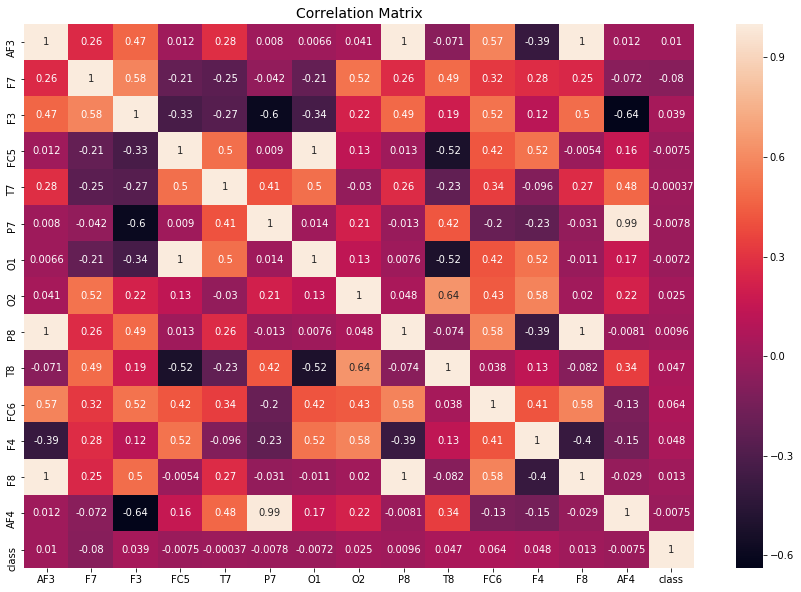

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=14)

### Data Visualization

In [29]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,class
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


Since all of our features oscillates around the same mean we could not infer much from our data distributions. Hence, pairwise relationship wouldn't have much info.

Lets do some visualization to sees if they've any relation

In [51]:
df[(df['F3'] > df['F3'].mean() + 1000) | (df['F3'] < df['F3'].mean() - 1000)] # With a few outliers

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection,class
898,7222.05,3797.95,1040.00,3733.85,6040.51,362564.00,6350.26,5361.54,1357.95,6215.38,3273.33,3091.28,276.4100,715897.00,b'0',0
10386,7398.46,2830.77,2457.44,642564.00,6474.36,8092.31,567179.00,5087.69,7143.59,1816.41,6137.95,6904.62,3504.1000,121026.00,b'0',0
11509,309231.00,5500.51,6880.51,5416.41,5454.87,4002.05,2086.15,4770.26,265641.00,3914.87,6823.08,2257.95,152308.0000,5022.56,b'1',1
13179,1030.77,7804.62,5762.56,2453.33,2089.74,2768.21,3581.54,7264.10,4586.15,6674.36,5170.77,7002.56,86.6667,1366.15,b'0',0


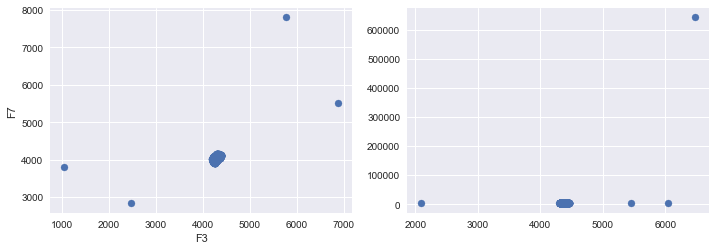

In [50]:
plt.style.use('seaborn')
# Lets plot a pairwise relation between F7 and F3, 
# as they have a correlation of 0.58 and sees if the data distribution tells us anything
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
plt.scatter(df['F3'], df['F7']) # Most points are around the 4k range, with a few outliers
plt.xlabel('F3')
plt.ylabel('F7')

# T7 & FC5 has a correlation of 0.5
plt.subplot(3, 3, 2)
plt.scatter(df['T7'], df['FC5']) # Same as the above graph F3 vs F7 with a few outliers..

# plt.subplot(3, 3, 3)
# sns.boxplot(df[''], df[''])

# plt.subplot(3, 3, 4)
# sns.boxplot(df[''], df[''])

# plt.subplot(3, 3, 5)
# sns.boxplot(df[''], df[''])

plt.tight_layout()

From the above graph, we sees that we could not infer much as most of the data are around the 4k range. 
There is no clear visible relationship from the above graph.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
pred = lr.predict(X_train)
print("\nLogistic Regression - Train accuracy (Eye Detection)", round(accuracy_score(y_train, pred), 5))

pred = lr.predict(X_test)
print("\nLogistic Regression - Test accuracy (Eye Detection)", round(accuracy_score(y_test, pred), 5))


Logistic Regression - Train accuracy (Eye Detection) 0.64791

Logistic Regression - Test accuracy (Eye Detection) 0.63218


Let's normalize/scale the feature and sees our accuracy improves

In [12]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [13]:
lr.fit(X_train_norm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
pred = lr.predict(X_train_norm)
print("\nLogistic Regression - Train accuracy (Eye Detection)", round(accuracy_score(y_train, pred), 5))

pred = lr.predict(X_test_norm)
print("\nLogistic Regression - Test accuracy (Eye Detection)", round(accuracy_score(y_test, pred), 5))


Logistic Regression - Train accuracy (Eye Detection) 0.56695

Logistic Regression - Test accuracy (Eye Detection) 0.53783


Looks like normalization or standardization doesn't increase our accuracy since these features are already on the same scale.

### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

c:\users\o\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
pred = rf.predict(X_train)
print("\nRandom Forest - Train accuracy (Eye Detection)", round(accuracy_score(y_train, pred), 5))

pred = rf.predict(X_test)
print("\nRandom Forest - Test accuracy (Eye Detection)", round(accuracy_score(y_test, pred), 5))


Random Forest - Train accuracy (Eye Detection) 0.9999

Random Forest - Test accuracy (Eye Detection) 0.91967


Our data does better with RandomForest as our model.
Possible assumption:
-  There isn't a linear trend with our data at hand
-  Need non-linear classifier

### Decision Tree 

In [17]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train, y_train)
prediction_dtc = model_dtc.predict(X_test)
print('Decison Tree accuracy: ', accuracy_score(prediction_dtc, y_test))

Decison Tree accuracy:  0.830663106364041


### K-Nearest neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

k_feats = []
k_scores = []
k_scores_test = []

for k in range(1, 10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    
    k_feats.append(k)
    
    pred = knn.predict(X_train)
    score = round(accuracy_score(y_train, pred), 5)
    k_scores.append(score)
    
    pred_test = knn.predict(X_test)
    score_test = round(accuracy_score(y_test, pred_test), 5)
    k_scores_test.append(score_test)

k_scores.sort(reverse=True)
k_scores_test.sort(reverse=True)

print("\nHighest KNN score - Train accuracy (Eye Detection)", k_scores[0])
print("\nHighest KNN score - Test accuracy (Eye Detection)", k_scores_test[0])


Highest KNN score - Train accuracy (Eye Detection) 1.0

Highest KNN score - Test accuracy (Eye Detection) 0.97308


### KNN testing k values

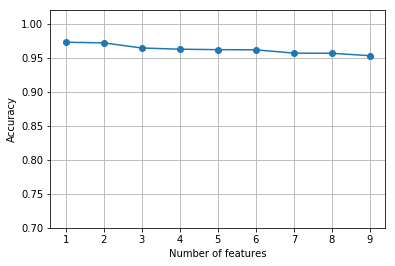

In [19]:
plt.figure()
plt.plot(k_feats, k_scores_test, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()

Looks like finding the true k value doesn't differ much in accuracy

## Feature Importances

Running our feature importances from RF to determine which features contributes the most to our model

In [20]:
# Feature importance
from sklearn.ensemble import RandomForestClassifier
class feat_importances():
    
    def __init__(self, n_estimators=500, test_size=0.3, random_state=1):
        self.test_size = test_size
        self.random_state = random_state
        self.n_estimators = n_estimators
    
    def get_feat_importances(self, X, y):
        print("Feature ranking:")
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        # optional hyperparameters tuning for rf: criterion='gini', max_depth=300, min_samples_split=3, min_samples_leaf=1
        feat_labels = X.columns
        forest = RandomForestClassifier(n_estimators=self.n_estimators, random_state=self.random_state)
        
        forest.fit(X_train, y_train)
        importances = forest.feature_importances_

        indices = np.argsort(importances)[::-1]
        
        for f in range(X_train.shape[1]):
            print("%2d) %-*s %f" % (indices[f], 30, feat_labels[indices[f]], importances[indices[f]]))
        plt.title('Feature Importance')
        plt.bar(range(X_train.shape[1]), importances[indices], align='center')
        plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.tight_layout()
        plt.show()
      
        
    #def plot_feat_importances():

Feature ranking:
 6) O1                             0.120263
 5) P7                             0.107375
 1) F7                             0.088277
12) F8                             0.081413
13) AF4                            0.080168
 0) AF3                            0.073849
11) F4                             0.062774
 3) FC5                            0.060112
10) FC6                            0.058436
 7) O2                             0.056643
 9) T8                             0.055841
 4) T7                             0.054281
 2) F3                             0.053182
 8) P8                             0.047385


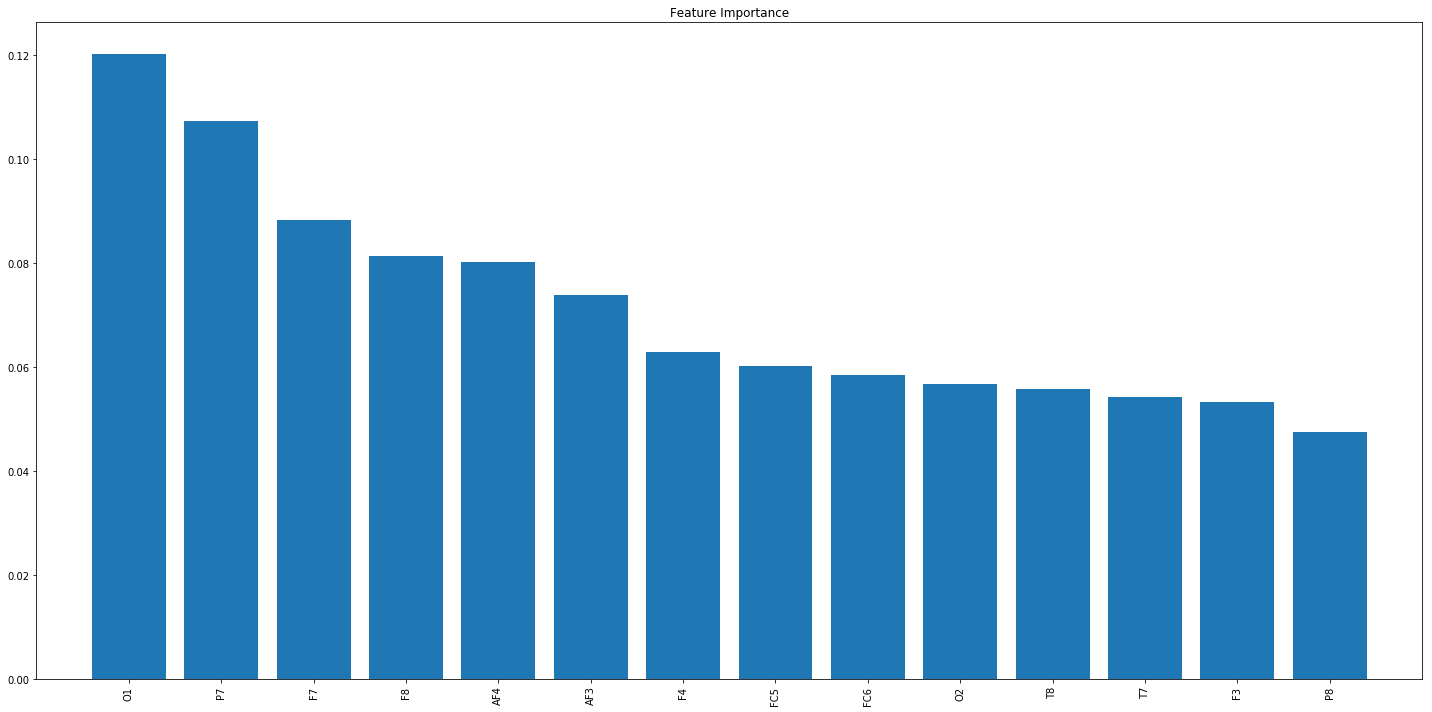

In [21]:
plt.figure(figsize=(20, 10))
feat_imp = feat_importances()
feat_imp.get_feat_importances(X_train, y_train)

Most features are equally important O1, P7 and F7 being the most important features.